## Lab - Cluster analysis

## Setup

In [11]:
# Following Lab developed by Sohyun Park

# data pre-processing
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

## 1. Data: Read the data frame with the projected score from PCA Lab. 

In [12]:
# Step 1: Reading the projected PCA scores from the saved CSV file
file_path = 'state_PCA_projected_scores.csv'
state_pca_df = pd.read_csv(file_path, index_col=0)

# (1) Leaving PC1 and PC2 only
state_pca_subset = state_pca_df[['PC1', 'PC2']]

# Displaying the first few rows of the subset data
state_pca_subset.head()

,PC1,PC2
State,,
Alabama,1.417708,-1.306608
Alaska,-2.846163,-0.837083
Arizona,-0.175020,-0.882933
Arkansas,0.874110,-1.863875
California,1.741656,2.567668


PC1 represents the population-related and socioeconomic characteristics of states. Higher PC1 values indicate states with high population density, larger populations, and higher median rent, while lower PC1 values correspond to rural states with large land areas and low population density.

PC2 captures educational and demographic characteristics. Higher PC2 values represent states with higher educational attainment and significant Asian populations, while lower values reflect states with lower education levels and higher poverty rates.

## 2. Apply the k-means clustering algorithm

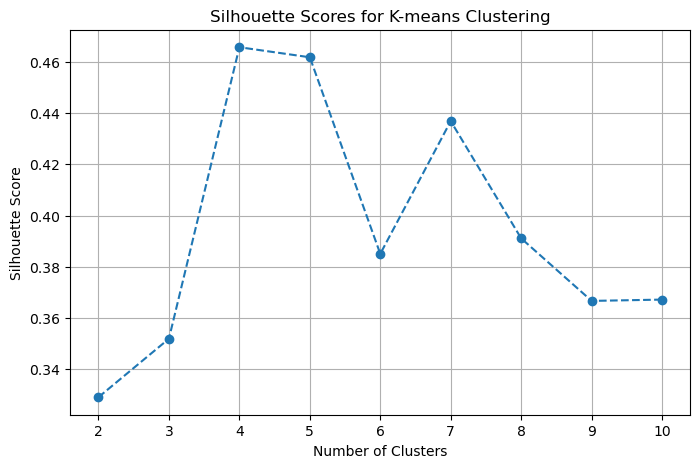

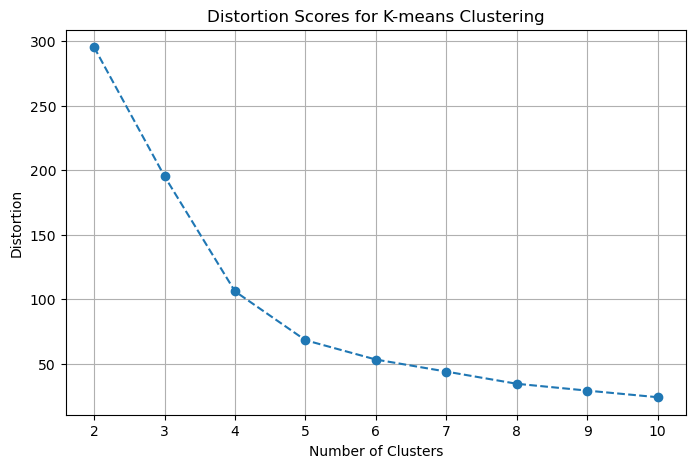

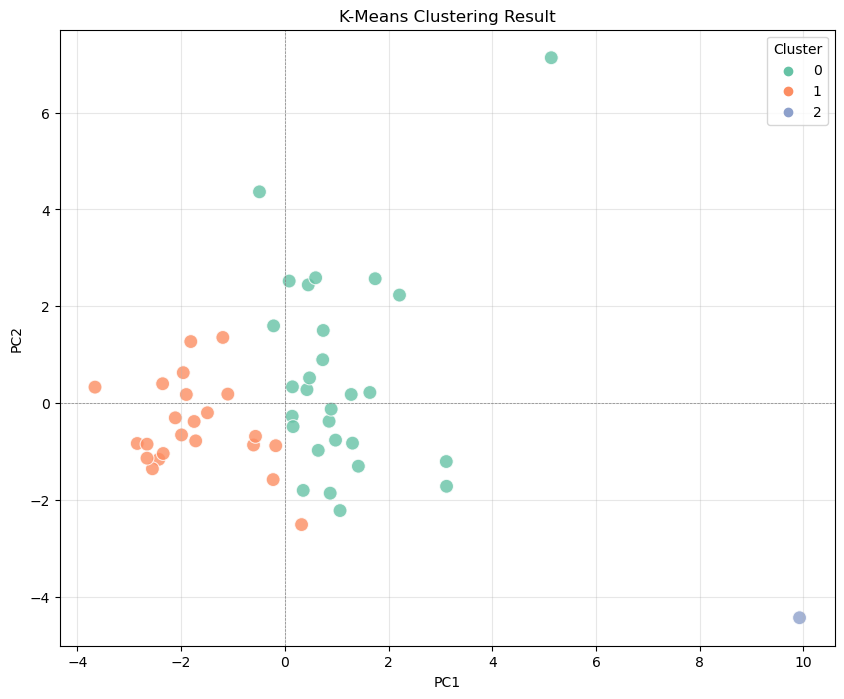

,PC1,PC2,Cluster
State,,,
Alabama,1.417708,-1.306608,0
Alaska,-2.846163,-0.837083,1
Arizona,-0.175020,-0.882933,1
Arkansas,0.874110,-1.863875,0
California,1.741656,2.567668,0


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# (1) Creating a Silhouette Score plot
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(state_pca_subset[['PC1', 'PC2']])
    silhouette_avg = silhouette_score(state_pca_subset[['PC1', 'PC2']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for K-means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# (2) Creating a Distortion Score plot (Elbow Method)
distortions = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(state_pca_subset[['PC1', 'PC2']])
    distortions.append(kmeans.inertia_)

# Plotting Distortion Scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, distortions, marker='o', linestyle='--')
plt.title("Distortion Scores for K-means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.grid()
plt.show()

# (3) Completing clustering analysis with the optimal number of clusters
optimal_clusters = 3  # Replace this with the chosen number from the plots
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
state_pca_subset['Cluster'] = final_kmeans.fit_predict(state_pca_subset[['PC1', 'PC2']])

# Visualizing the clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=state_pca_subset,
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('K-Means Clustering Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()

# Displaying the DataFrame with cluster assignments
state_pca_subset[['PC1', 'PC2', 'Cluster']].head()

## 3. Interpretation 

                   State  Cluster
0                Alabama        0
1                 Alaska        1
2                Arizona        1
3               Arkansas        0
4             California        0
5               Colorado        1
6            Connecticut        0
7               Delaware        0
8   District of Columbia        0
9                Florida        0
10               Georgia        0
11                Hawaii        0
12                 Idaho        1
13              Illinois        0
14               Indiana        1
15                  Iowa        1
16                Kansas        1
17              Kentucky        0
18             Louisiana        0
19                 Maine        1
20              Maryland        0
21         Massachusetts        0
22              Michigan        0
23             Minnesota        1
24           Mississippi        0
25              Missouri        1
26               Montana        1
27              Nebraska        1
28            

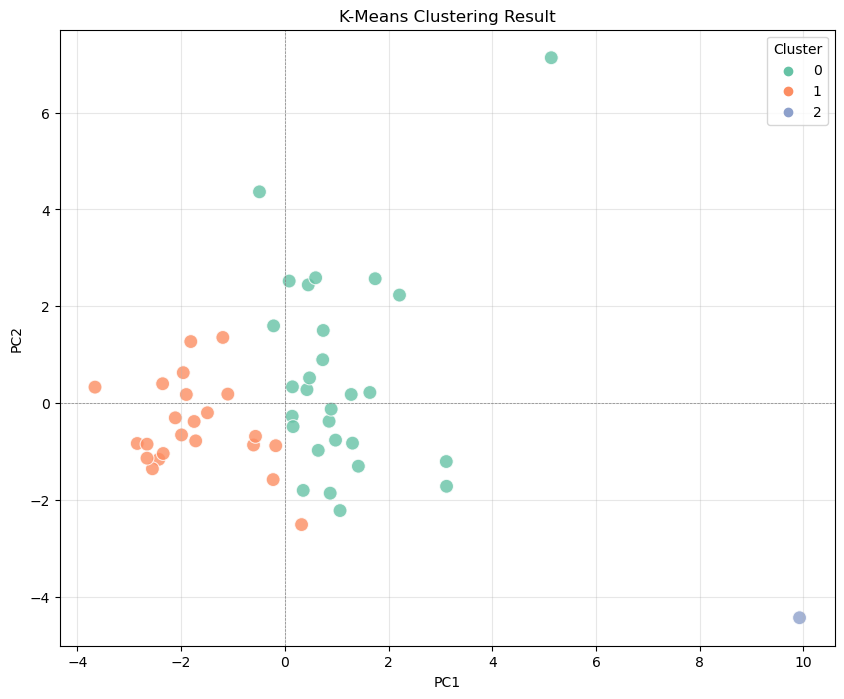

In [20]:
# Ensuring the clustering results are correctly assigned to the DataFrame
state_pca_subset['Cluster'] = final_kmeans.labels_

# Reseting the index and preparing the DataFrame for analysis
state_pca_subset_with_clusters = state_pca_subset.reset_index()
state_pca_subset_with_clusters.rename(columns={'index': 'State'}, inplace=True)

# (1) Printing out the list of states with their cluster membership information
state_cluster_list = state_pca_subset_with_clusters[['State', 'Cluster']]
print(state_cluster_list)

# (2) Printing out the mean value of PC1 and PC2 by cluster
cluster_means = state_pca_subset_with_clusters.groupby('Cluster')[['PC1', 'PC2']].mean()
print(cluster_means)


# (3) Creating a scatter plot of every object showing the clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=state_pca_subset_with_clusters,
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('K-Means Clustering Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()